In [101]:
import tensorflow as tf
import tensorflow.keras as kr

import matplotlib.pyplot as plt
import numpy as np

In [102]:
from keras import backend as K

In [103]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image #Esto permite manipular imagenes

lr = 0.01
nn = [32, 32, 64, 64,1]  # número de neuronas por capa.
#Conv2d de 32
#Conv2d de 32
#Conv2d de 64
#Dense de 64
#Dense de 1. Esto es porque la red tiene dos salidas entonces con una sola neurona (0 o 1) alcanza.

In [104]:
model = Sequential()
model.add(Conv2D(nn[0], (3, 3), input_shape=(150, 150, 3))) #Aca se esta agregando un nn[0] filtros de convolucion (o sea 32)
# Cada filtro es de 3x3 y la entrada a esta capa es de 150x150 y de 3 canales
model.add(Activation('relu')) #La funcion de activacion es ReLU
model.add(MaxPooling2D(pool_size=(2, 2))) #Se hace un MaxPool de 2x2 para downsamplear la entrada y asi reducir el overfitting

model.add(Conv2D(nn[1], (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(nn[2], (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



In [105]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(nn[3])) #Perceptron multi capa, 64 neuronas
model.add(Activation('relu')) 
model.add(Dropout(0.5)) #Eliminas el 50% de las neuronas reduciendo asi el overfitting
model.add(Dense(nn[4])) #Una neurona solita
model.add(Activation('sigmoid')) #Sigmoide en vez de ReLU para que la salida sea mas binaria

model.compile(loss='binary_crossentropy', #Funcion de perdida
              optimizer='rmsprop', #Optimizador
              metrics=['accuracy']) #Metricas

In [106]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'Dataset/Training',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'Dataset/Test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 1937 images belonging to 2 classes.
Found 833 images belonging to 2 classes.


In [107]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('third_try.h5')  # always save your weights after training or during training

Epoch 1/50
125/125 [==============================] - 160s 1s/step - loss: 0.5332 - acc: 0.7720 - val_loss: 0.4648 - val_acc: 0.8200
Epoch 2/50
125/125 [==============================] - 156s 1s/step - loss: 0.4149 - acc: 0.8345 - val_loss: 0.4289 - val_acc: 0.8586
Epoch 3/50
125/125 [==============================] - 155s 1s/step - loss: 0.3994 - acc: 0.8475 - val_loss: 0.3258 - val_acc: 0.8790
Epoch 4/50
125/125 [==============================] - 153s 1s/step - loss: 0.4096 - acc: 0.8440 - val_loss: 0.3211 - val_acc: 0.8713
Epoch 5/50
125/125 [==============================] - 153s 1s/step - loss: 0.3799 - acc: 0.8476 - val_loss: 0.3255 - val_acc: 0.8726
Epoch 6/50
125/125 [==============================] - 153s 1s/step - loss: 0.3636 - acc: 0.8535 - val_loss: 0.3420 - val_acc: 0.8841
Epoch 7/50
125/125 [==============================] - 153s 1s/step - loss: 0.3428 - acc: 0.8665 - val_loss: 0.3403 - val_acc: 0.8471
Epoch 8/50
125/125 [==============================] - 154s 1s/step - 

In [90]:
#model.load_weights('first_try.h5') #El primer entrenamiento fue de 4 epochs y llego a 88% de accuracy de validation

(1, 150, 150, 3)


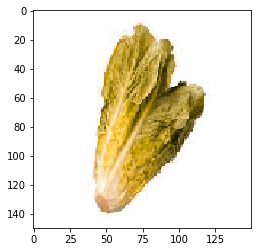

In [112]:
x = image.load_img("./lechuga2.jpg", target_size=(150,150)) #Cargo la imagen y la reshapeo a 299x299 para que sea compatible
#con la red neuronal que pide ese tamaño de entrada

x = image.img_to_array(x) #La convierto en matriz

x = (x/255.)

plt.imshow(x)

x3 = x.reshape(1,x.shape[0],x.shape[1],x.shape[2]) #Listo. Por que esto es asi? Esto lo podes ver en la documentacion de keras
#Siempre que uses una red nueva que ya venga entrenada, debes leer bien la documentacion

print(x3.shape)

In [113]:
y1 = model.predict(x3)

if y1 > 0.5:
    print("Es una lechuga")
else:
    print("Es una banana")

print("porcentaje de lechuga: ")
print(y1*100)
print("porcentaje de banana: ")
print(100-y1*100)

Es una banana
porcentaje de lechuga: 
[[33.851208]]
porcentaje de banana: 
[[66.14879]]
